In [3]:
! pip install biopython seaborn matplotlib 

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\khush\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
from Bio import Entrez, SeqIO

Entrez.mail= "khushidriven@gmail.com"

handle = Entrez.efetch(db="nuccore", id="U00096.3", rettype="gb", retmode="text")
record = SeqIO.read(handle, "genbank")
handle.close()

gene_name= "lacZ"
lacZ_seq= ""

for feature in record.features:
    if feature.type == "gene" and "gene" in feature.qualifiers:
        if feature.qualifiers["gene"][0] == gene_name:
            start = feature.location.start
            end = feature.location.end
            lacZ_seq = record.seq[start:end]
            
print("First 300 bases of lacZ:")
print(lacZ_seq[:200])
print("Length: , len(lacZ_seq)")
   


First 300 bases of lacZ:
TTATTTTTGACACCAGACCAACTGGTAATGGTAGCGACCGGCGCTCAGCTGGAATTCCGCCGATACTGACGGGCTCCAGGAGTCGTCGCCACCAATCCCCATATGGAAACCGTCGATATTCAGCCATGTGCCTTCTTCCGCGTGCAGCAGATGGCGATGGCTGGTTTCCATCAGTTGCTGTTGACTGTAGCGGCTGATGT
Length: , len(lacZ_seq)


In [10]:
# CALCULATE GC_CONTENT
from Bio.SeqUtils import gc_fraction
gc = gc_fraction(lacZ_seq) * 100 
print("GC Content of lacZ gene:", gc)

GC Content of lacZ gene: 56.26016260162602


In [11]:
# Codon usage 
from collections import Counter 

codons= [str(lacZ_seq[i:i+3]) for i in range(0,len(lacZ_seq), 3)]
codon_count= Counter(codons)
 
for codon,count in codon_count.items():
    print(codon, "---", count )

TTA --- 1
TTT --- 15
TTG --- 15
ACA --- 5
CCA --- 39
GAC --- 19
CAA --- 11
CTG --- 43
GTA --- 18
ATG --- 19
GCG --- 37
ACC --- 24
GGC --- 28
GCT --- 25
CAG --- 54
GAA --- 19
TTC --- 47
CGC --- 28
CGA --- 9
TAC --- 9
TGA --- 8
CGG --- 36
GGA --- 6
GTC --- 22
GCC --- 34
AAT --- 22
CCC --- 9
CAT --- 24
GAT --- 17
ATT --- 17
TGT --- 8
GTG --- 15
GGT --- 24
ACT --- 9
GTT --- 30
TGG --- 6
ATA --- 13
CGT --- 20
GCA --- 11
ATC --- 42
AAA --- 19
AGT --- 4
AAG --- 9
GGG --- 9
TAA --- 7
TCC --- 4
GAG --- 9
CCG --- 7
CTC --- 15
TGC --- 12
CAC --- 24
AAC --- 12
AGC --- 9
CTT --- 5
AGG --- 11
ACG --- 19
TAG --- 6
AGA --- 3
TCG --- 3


In [12]:
# TRANSLATION OF GENE 
protein= lacZ_seq.translate()
print(protein[:300])
print("Protein Length:", len(protein))


LFLTPDQLVMVATGAQLEFRRY*RAPGVVATNPHMETVDIQPCAFFRVQQMAMAGFHQLLLTVAADVELEVAAPLVWAIIQFARPAAQTVFAREDVRGIHV*QWQIPAVKTGGSKAVGIVFLRP*SEPVYPLCYLRQLAVQANPRRMRCIARHFNINGNRHLTTTINPVGFPADK*GFPLMLPRVSGRNQHRISKCICRALQQRCFGLVMARRLPAFDPGVRVNAGRFTYANVVIQRCTGELIAQRRQQLFFIANPHL*KKA*LAVKLPTLITQLDAKIHFAGGQMRDGVGRGGERHTEV
Protein Length: 1025


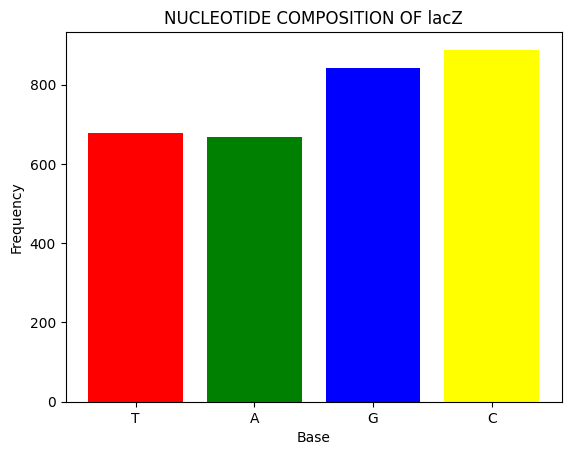

In [13]:
# visualization of composition of nucleotide 
import matplotlib.pyplot as plt 
from collections import Counter 

counts= Counter(str(lacZ_seq))

plt.bar(counts.keys(), counts.values(), color=['red','green','blue','yellow'])
plt.title("NUCLEOTIDE COMPOSITION OF lacZ")
plt.xlabel("Base")
plt.ylabel("Frequency")
plt.show()




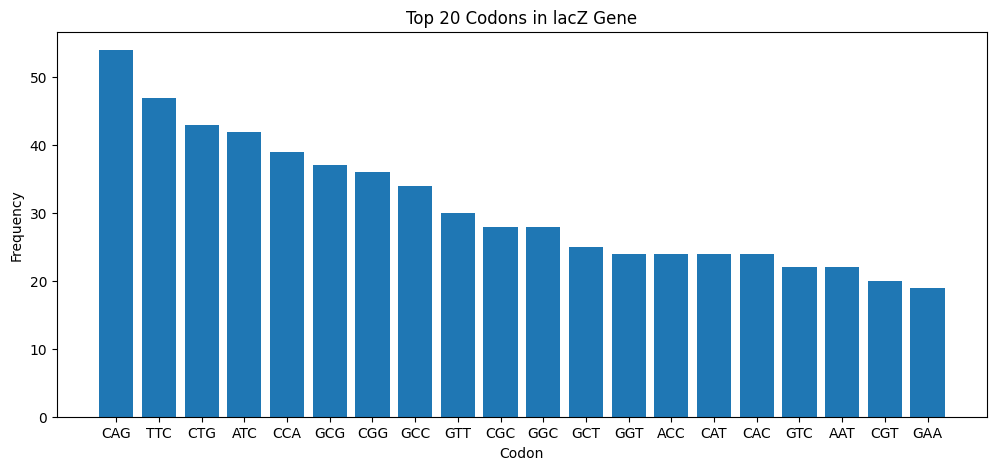

In [14]:
# Visualization of Top 20 codons in lacZ gene
import pandas as pd 
    
codon_df= pd.DataFrame.from_dict(codon_count, orient= "index", columns= ["Count"])
codon_df= codon_df.sort_values(by="Count", ascending=False)

plt.figure(figsize=(12,5))
plt.bar(codon_df.index[:20], codon_df["Count"][:20])
plt.title("Top 20 Codons in lacZ Gene")
plt.xlabel("Codon")
plt.ylabel("Frequency")
plt.show()


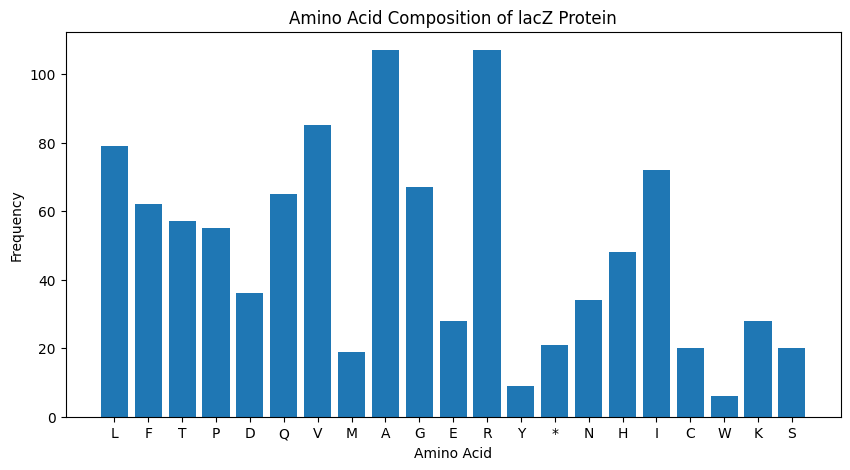

In [ ]:
# Visualization of amino acid composition of lacZ protein 
from collections import Counter

aa_counts = Counter(str(protein))

plt.figure(figsize=(10,5))
plt.bar(aa_counts.keys(), aa_counts.values())
plt.title("Amino Acid Composition of lacZ Protein")
plt.xlabel("Amino Acid")
plt.ylabel("Frequency")
plt.show()

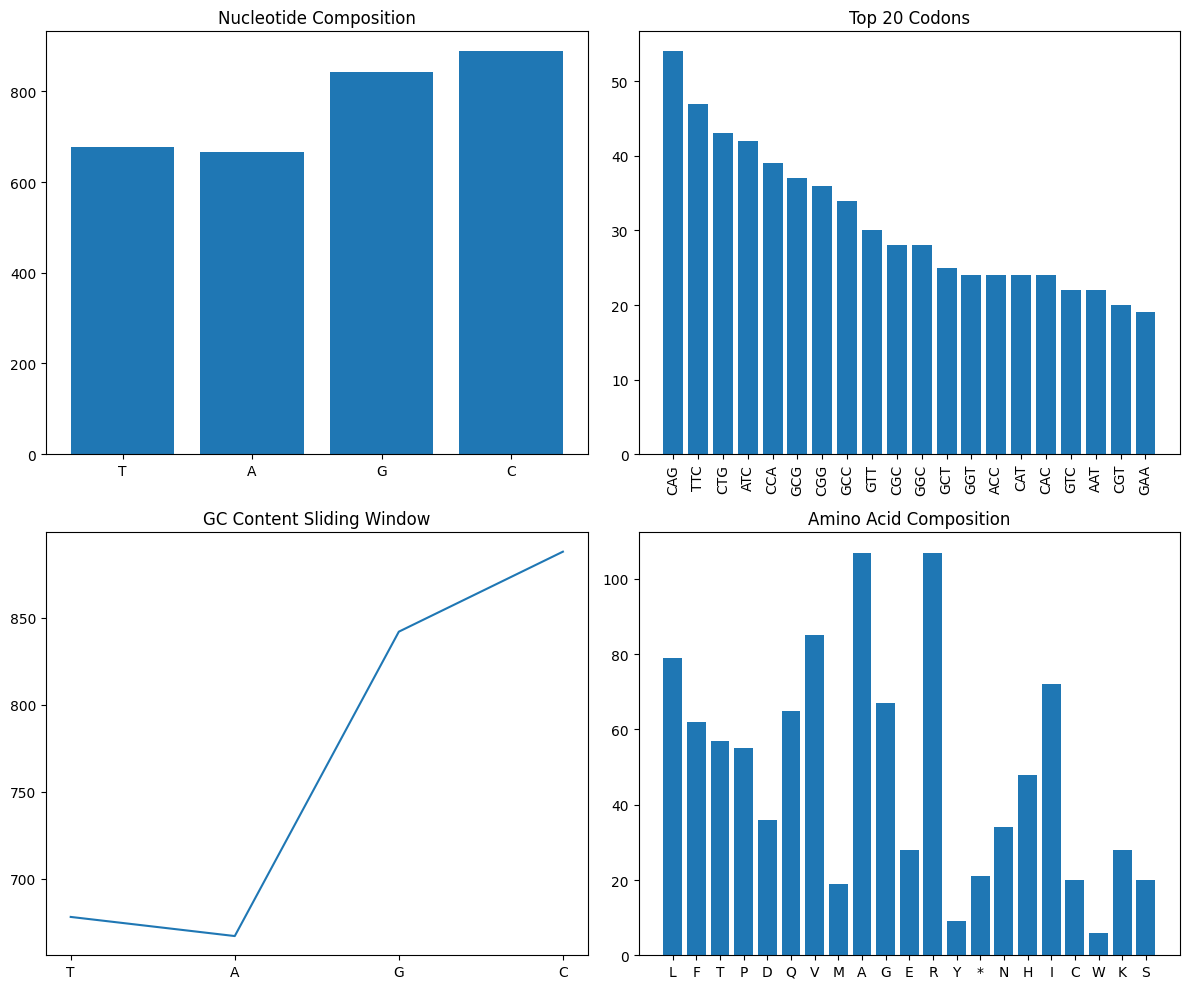

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.bar(counts.keys(), counts.values())
plt.title("Nucleotide Composition")

plt.subplot(2,2,2)
plt.bar(codon_df.index[:20], codon_df["Count"][:20])
plt.title("Top 20 Codons")
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.plot(counts.keys(), counts.values())
plt.title("GC Content Window")

plt.subplot(2,2,4)
plt.bar(aa_counts.keys(), aa_counts.values())
plt.title("Amino Acid Composition")

plt.tight_layout()
plt.show()
